# TP DE MACHINE LEARNING

## DEUXIEME QUESTION

### 1. Charger les données

### Importer les librairies nécessaires 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


### Charger le jeu des données 

In [15]:
df= pd.read_csv("sonar.csv")

### Analyser le jeu des données en indiquant 

#### Le « shape »

In [16]:
# Shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (207, 61)


#### Le types des données ;

In [17]:
# Data types
print(f"Data types: {df.dtypes}")

Data types: 0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object


#### Un aperçu des données ;

In [18]:
# Preview of the data
print("Preview of the data:")
print(df.head())

Preview of the data:
   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R  
2 

#### Un résumé statistique de toutes les caractéristiques ;

In [19]:

# Statistical summary
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
           0.0200      0.0371      0.0428      0.0207      0.0954      0.0986  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.029208    0.038443    0.043837    0.054053    0.075105    0.104599   
std      0.023038    0.033040    0.038521    0.046583    0.055669    0.059247   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013300    0.016400    0.018900    0.024450    0.037700    0.066950   
50%      0.022800    0.030800    0.034200    0.044100    0.062000    0.092100   
75%      0.035800    0.048100    0.058200    0.065700    0.101050    0.134150   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

           0.1539      0.1601      0.3109      0.2111  ...      0.0232  \
count  207.000000  207.000000  207.000000  207.000000  ...  207.000000   
mean     0.121591    0.134677    0.177361    0.208245  ...    0.016034   
std      0.061897    0.085

#### La distribution des classes.

In [20]:
# Distribution of classes
print("\nDistribution of classes:")
print(df.value_counts())


Distribution of classes:
0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  0.1609  0.1582  0.2238  0.0645  0.0660  0.2273  0.3100  0.2999  0.5078  0.4797  0.5783  0.5071  0.4328  0.5550  0.6711  0.6415  0.7104  0.8080  0.6791  0.3857  0.1307  0.2604  0.5121  0.7547  0.8537  0.8507  0.6692  0.6097  0.4943  0.2744  0.0510  0.2834  0.2825  0.4256  0.2641  0.1386  0.1051  0.1343  0.0383  0.0324  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  0.0090  0.0032  R
0.1371  0.1226  0.1385  0.1484  0.1776  0.1428  0.1773  0.2161  0.1630  0.2067  0.4257  0.5484  0.7131  0.7003  0.6777  0.7939  0.9382  0.8925  0.9146  0.7832  0.7960  0.7983  0.7716  0.6615  0.4860  0.5572  0.4697  0.5640  0.4517  0.3369  0.2684  0.2339  0.3052  0.3016  0.2753  0.1041  0.1757  0.3156  0.3603  0.2736  0.1301  0.2458  0.3404  0.1753  0.0679  0.1062  0.0643  0.0532  0.0531  0.0272  0.0171  0.0118  0.0129  0.0344  0.0065  0.0067  0.0022  0.0079  0.0146  0.0051  M    1
0.016

### Visualiser les données en utilisant les histogrammes et les « plots »

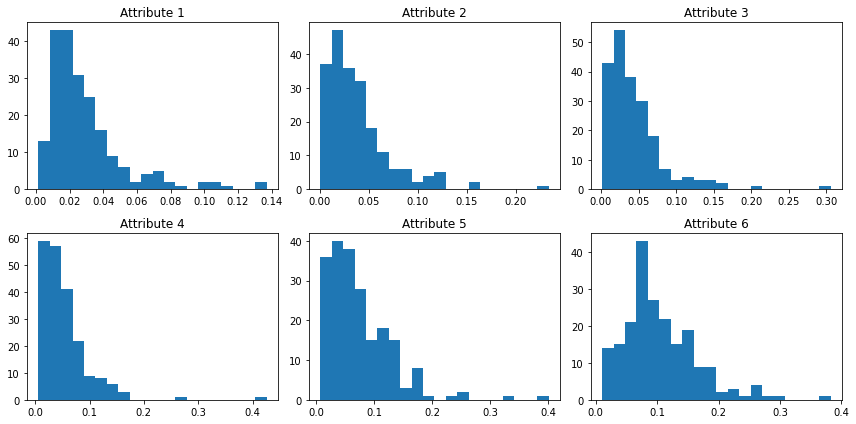

In [21]:
# Histograms
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(df.iloc[:, i], bins=20)
    plt.title(f"Attribute {i+1}")
plt.tight_layout()
plt.show()

#### Visualiser les corrélations

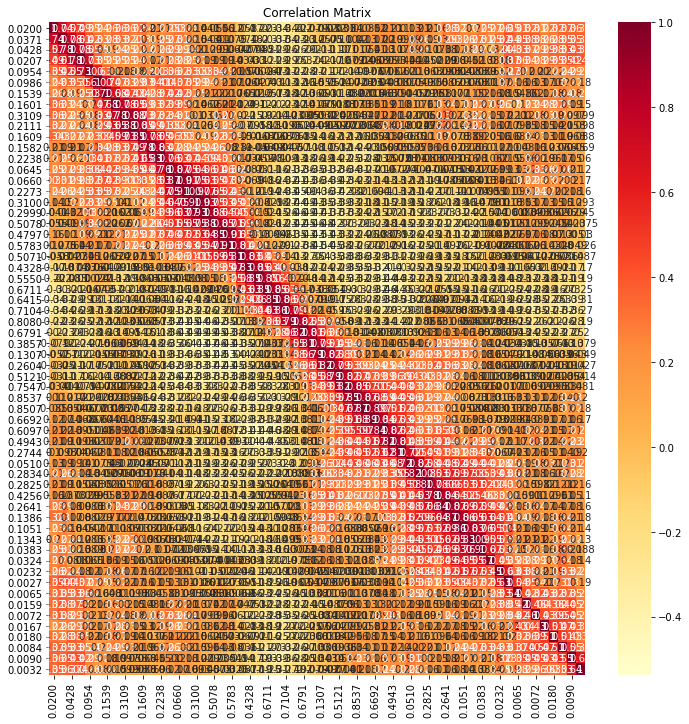

In [22]:
# Correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap="YlOrRd")
plt.title("Correlation Matrix")
plt.show()

### 2.Evaluer certains algorithmes et estimer leurs précisions sur des données non vues.

#### Créer un jeu de test (0.2 ou 20%)

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Mettre en place le dispositif de test pour utiliser une validation croisée 10 folds
(performance des modèles : « accuracy ».

In [24]:
def evaluate_model(model):
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    return scores.mean()

#### Construire et comparer 4 modèles différents pour prédire sur le type de son

In [25]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

for model in models:
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {evaluate_model(model):.2f}")

Model: LogisticRegression
Accuracy: 0.65
Model: KNeighborsClassifier
Accuracy: 0.59
Model: DecisionTreeClassifier
Accuracy: 0.61
Model: SVC
Accuracy: 0.64


#### Sélectionner le meilleur modèle.

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

for model in models:
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {evaluate_model(model):.2f}")

Model: LogisticRegression
Accuracy: 0.65
Model: KNeighborsClassifier
Accuracy: 0.59
Model: DecisionTreeClassifier
Accuracy: 0.62
Model: SVC
Accuracy: 0.64


### 3.Faire des prédictions.

#### Evaluer les mêmes algorithmes sur une version standardisée du jeu des données 

In [27]:
param_grid = {'C': [0.1, 1, 10]}
logistic_reg = LogisticRegression()
grid_search = GridSearchCV(logistic_reg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

print(f"Meilleure précision: {grid_search.best_score_:.2f}")
print(f"Meilleur paramètre C: {grid_search.best_params_['C']}")

Meilleure précision: 0.65
Meilleur paramètre C: 1


### 4.Réglage des algorithmes

#### Ajuster les paramètres pour les deux modèles qui ont montré de belles promesses lors de l’évaluation dans la section précédente

In [28]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)

print(f"Meilleure précision: {grid_search.best_score_:.2f}")
print(f"Meilleurs paramètres: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")


Meilleure précision: 0.65
Meilleurs paramètres: C=10, gamma=0.1


### 5.Les méthodes d’ensemble

#### Une autre manière qui permet d’améliorer la performance des algorithmes de ce problème est d’utiliser les méthodes d’ensemble.

####  Utiliser 3 méthodes d’ensemble :

#### Deux méthodes de boosting : Adaboost et Gradient boosting ;

In [29]:
# AdaBoost
ada_boost = AdaBoostClassifier()
ada_boost_score = cross_val_score(ada_boost, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision AdaBoost: {ada_boost_score:.2f}")

Précision AdaBoost: 0.67


#### Une méthode de bagging : Forêts aléatoires (Random forest) ;

In [30]:
# Gradient Boosting
grad_boost = GradientBoostingClassifier()
grad_boost_score = cross_val_score(grad_boost, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision Gradient Boosting: {grad_boost_score:.2f}")

Précision Gradient Boosting: 0.71


#### Utiliser le même dispositif de validation que précédemment (la validation croisée à 10 folds)


In [31]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest_score = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision Random Forest: {random_forest_score:.2f}")

Précision Random Forest: 0.72


#### Aucune standardisation des données n’est utilisée dans ce cas, car les trois algorithmes d’ensemble sont basées sur des arbres de décision qui sont moins sensibles aux distributions des données.

In [32]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 6. Finaliser le modèle.

#### Finaliser le modèle en l’entrainant sur l’ensemble du jeu des données d’entrainement et en effectuant les prédictions sur l’ensemble de test pour confirmer les résultats.

In [33]:
# Entraînement du modèle SVM sur l'ensemble des données d'entraînement
svm_clf = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svm_clf.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1)

#### Utiliser pour cela le meilleur modèle que vous aurez trouvé dans vos investigations précédentes.


In [34]:
# Prédictions sur l'ensemble de test
y_pred = svm_clf.predict(X_test_scaled)


#### Vérifier et intégrer le fait que le SVM fonctionne mieux lorsque le jeu des données est standardisé de telle sorte que tous les attributs aient une valeur moyenne de 0 et un écart type de 1. Vous pouvez appliquer cette transformation au jeu complet des données d’entrainement et également aux attributs du jeu de test

In [35]:
# Évaluation des performances sur le jeu de test
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur le jeu de test: {accuracy:.2f}")

Précision sur le jeu de test: 0.79
